In [1]:
%%capture
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install -U sentence-transformers
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sentence_transformers import SentenceTransformer, util
import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

1. [quran dataset](https://www.kaggle.com/datasets/alizahidraja/quran-english)
2. [bible dataset](https://www.kaggle.com/datasets/phyred23/bibleverses)

In [2]:
en_quran = pd.read_csv('../input/quran-english/Quran_English.csv')
en_quran.head(1)

,Name,Surah,Ayat,Verse
0,The Opening,1,1,"In the name of Allah, the Beneficent, the Merc..."


In [3]:
kjv = pd.read_csv('/kaggle/input/bibleverses/bible_data_set.csv')
kjv.book.unique()

array(['Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy',
       'Joshua', 'Judges', 'Ruth', '1 Samuel', '2 Samuel', '1 Kings',
       '2 Kings', '1 Chronicles', '2 Chronicles', 'Ezra', 'Nehemiah',
       'Esther', 'Job', 'Psalms', 'Proverbs', 'Ecclesiastes',
       'Song of Solomon', 'Isaiah', 'Jeremiah', 'Lamentations', 'Ezekiel',
       'Daniel', 'Hosea', 'Joel', 'Amos', 'Obadiah', 'Jonah', 'Micah',
       'Nahum', 'Habakkuk', 'Zephaniah', 'Haggai', 'Zechariah', 'Malachi',
       'Matthew', 'Mark', 'Luke', 'John', 'Acts', 'Romans',
       '1 Corinthians', '2 Corinthians', 'Galatians', 'Ephesians',
       'Philippians', 'Colossians', '1 Thessalonians', '2 Thessalonians',
       '1 Timothy', '2 Timothy', 'Titus', 'Philemon', 'Hebrews', 'James',
       '1 Peter', '2 Peter', '1 John', '2 John', '3 John', 'Jude',
       'Revelation'], dtype=object)

In [4]:
old = ['Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy',
       'Joshua', 'Judges', 'Ruth', '1 Samuel', '2 Samuel', '1 Kings',
       '2 Kings', '1 Chronicles', '2 Chronicles', 'Ezra', 'Nehemiah',
       'Esther', 'Job', 'Psalms', 'Proverbs', 'Ecclesiastes',
       'Song of Solomon', 'Isaiah', 'Jeremiah', 'Lamentations', 'Ezekiel',
       'Daniel', 'Hosea', 'Joel', 'Amos', 'Obadiah', 'Jonah', 'Micah',
       'Nahum','Habakkuk','Zephaniah','Haggai','Zechariah','Malachi']

len(old) 


39

In [5]:
old_kjv = kjv[kjv.book.isin(old)]

en_torah = old_kjv.copy()

In [6]:
len(kjv) - len(old_kjv)


7957

In [7]:
en_torah.head(1)

,citation,book,chapter,verse,text
0,Genesis 1:1,Genesis,1,1,In the beginning God created the heaven and th...


In [8]:
max_len = en_quran.Verse.str.split().map(lambda x: len(x))
max_len = max_len.tolist()
max_val =  max(max_len)
print(max_val)
max_idx = max_len.index(max_val)
max_idx

273


288

In [9]:
en_torah.text[10]

'And God said, Let the earth bring forth grass, the herb yielding seed, and the fruit tree yielding fruit after his kind, whose seed is in itself, upon the earth: and it was so. \n'

In [10]:
max_len = en_torah.text.str.split().map(lambda x: len(x))
max_len = max_len.tolist()
max_val =  max(max_len)
print(max_val)
max_idx = max_len.index(max_val)
max_idx

86


12826

In [11]:
torah_list = en_torah.text.tolist()
quran_list = en_quran.Verse.tolist()
len(torah_list),len(quran_list)

(23145, 6236)

In [12]:
#asymmetric semantic search
model = SentenceTransformer('all-mpnet-base-v2', device="cuda")


#Compute embedding for both lists (quran and torah)
torah_embeddings = model.encode(torah_list, convert_to_tensor=True)
quran_embeddings = model.encode(quran_list, convert_to_tensor=True)

torah_embeddings = torah_embeddings.to('cuda')
torah_embeddings = util.normalize_embeddings(torah_embeddings)

quran_embeddings = quran_embeddings.to('cuda')
quran_embeddings = util.normalize_embeddings(quran_embeddings)


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/724 [00:00<?, ?it/s]

Batches:   0%|          | 0/195 [00:00<?, ?it/s]

In [13]:
len(torah_embeddings),len(quran_embeddings)

(23145, 6236)

In [14]:
%%time

hits = util.semantic_search(torah_embeddings, quran_embeddings, score_function=util.dot_score)

dot_score = util.dot_score(torah_embeddings[0], quran_embeddings[0]).item()

dot_score


CPU times: user 271 ms, sys: 15.8 ms, total: 286 ms
Wall time: 293 ms


0.20536895096302032

In [15]:
sim_quran_torah = en_torah.copy()
sim_quran_torah = sim_quran_torah.rename(columns={"citation": "t_citation", "book": "t_book", "chapter": "t_chapter", "verse": "t_verse", "text": "t_text"})


sim_quran_torah['q_Name'] = "Quran Surah Name"
sim_quran_torah['q_Surah'] = "Quran Surah Number"
sim_quran_torah['q_Ayat'] = "Quran Ayat Number of corresponding Surah"
sim_quran_torah['q_Verse'] = "Quranic Verse of Corresponding surah and ayat"

sim_quran_torah['similarity_score'] = 0.0

sim_quran_torah.head(1)

,t_citation,t_book,t_chapter,t_verse,t_text,q_Name,q_Surah,q_Ayat,q_Verse,similarity_score
0,Genesis 1:1,Genesis,1,1,In the beginning God created the heaven and th...,Quran Surah Name,Quran Surah Number,Quran Ayat Number of corresponding Surah,Quranic Verse of Corresponding surah and ayat,0.0


In [16]:
%%time

for i in range(len(torah_embeddings)):
    best_score = 0.0
    idx = 0
    for j in range(len(quran_embeddings)):
        dot_score = util.dot_score(torah_embeddings[i], quran_embeddings[j]).item()
        if(dot_score>best_score):
            best_score = dot_score
            idx = j
            
 
    sim_quran_torah.loc[i, 'similarity_score'] = best_score
    sim_quran_torah.loc[i, 'q_Name'] = en_quran.loc[idx, 'Name']
    sim_quran_torah.loc[i, 'q_Surah'] = en_quran.loc[idx, 'Surah']
    sim_quran_torah.loc[i, 'q_Ayat'] = en_quran.loc[idx, 'Ayat']
    sim_quran_torah.loc[i, 'q_Verse'] = en_quran.loc[idx, 'Verse']
    
sim_quran_torah.head()

CPU times: user 1h 33min 21s, sys: 5.39 s, total: 1h 33min 26s
Wall time: 1h 33min 45s


,t_citation,t_book,t_chapter,t_verse,t_text,q_Name,q_Surah,q_Ayat,q_Verse,similarity_score
0,Genesis 1:1,Genesis,1,1,In the beginning God created the heaven and th...,The Prophets,21,16,We created not the heaven and the earth and al...,0.760044
1,Genesis 1:2,Genesis,1,2,"And the earth was without form, and void; and ...",The Bee,16,15,And He hath cast into the earth firm hills tha...,0.593950
2,Genesis 1:3,Genesis,1,3,"And God said, Let there be light: and there wa...",Noah,71,16,"And hath made the moon a light therein, and ma...",0.656689
3,Genesis 1:4,Genesis,1,4,"And God saw the light, that it was good: and G...",Those Who Drag Forth,79,29,"And He made dark the night thereof, and He bro...",0.637230
4,Genesis 1:5,Genesis,1,5,"And God called the light Day, and the darkness...",Those Who Drag Forth,79,29,"And He made dark the night thereof, and He bro...",0.685453


In [17]:

sim_quran_torah = sim_quran_torah.sort_values(by=['similarity_score'], ascending=False)

In [18]:
sim_quran_torah.to_csv("mpnet_v2_similarities_between_quran_and_torah.csv",index = False)

In [19]:
sim_quran_torah['similarity_score'] =sim_quran_torah['similarity_score'] * 100
sim_quran_torah['similarity_score'] =sim_quran_torah['similarity_score'].astype(int)
sim_quran_torah

,t_citation,t_book,t_chapter,t_verse,t_text,q_Name,q_Surah,q_Ayat,q_Verse,similarity_score
1260,Genesis 42:8,Genesis,42,8,"And Joseph knew his brethren, but they knew no...",Joseph,12,58,And Joseph’s brethren came and presented thems...,92
14021,Psalms 8:9,Psalms,8,9,"O LORD our Lord, how excellent is thy name in ...",The Beneficent,55,78,"Blessed be the name of thy Lord, Mighty and gl...",83
15814,Psalms 113:1,Psalms,113,1,"Praise ye the LORD. Praise, O ye servants of t...",The Most High,87,1,"Praise the name of thy Lord the Most High,",82
15815,Psalms 113:2,Psalms,113,2,Blessed be the name of the LORD from this time...,The Beneficent,55,78,"Blessed be the name of thy Lord, Mighty and gl...",82
10828,1 Chronicles 16:8,1 Chronicles,16,8,"Give thanks unto the LORD, call upon his name,...",Light,24,56,Establish worship and pay the poor-due and obe...,82
...,...,...,...,...,...,...,...,...,...,...
2587,Exodus 36:21,Exodus,36,21,"The length of a board was ten cubits, and the ...",The Star,53,9,Till he was (distant) two bows’ length or even...,33
4805,Numbers 33:45,Numbers,33,45,"And they departed from Iim, and pitched in Dib...",Al-Hijr,15,93,Of what they used to do.,32
6414,Joshua 21:33,Joshua,21,33,All the cities of the Gershonites according to...,Smoke,44,25,How many were the gardens and the watersprings...,32
12004,2 Chronicles 36:11,2 Chronicles,36,11,Zedekiah was one and twenty years old when he ...,The Heights,7,142,And when We did appoint for Moses thirty night...,31


<AxesSubplot:>

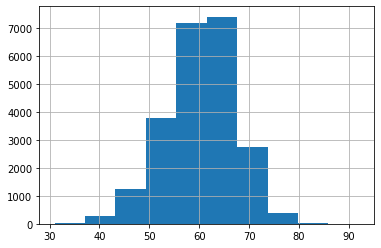

In [20]:
sim_quran_torah['similarity_score'].hist()